In [20]:
#Projemizde kullanacağımız MNIST elyazısı rakamları veritabanında(sklearn içinde gelmektedir) 784 feature sütunu mevcut (784 dimensions),
# ve training set olarak 60,000 örnek veri ve a 10,000 örneklik test seti bulunmaktadır.
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml  # mnist datasetini yüklemek için gerekli
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Bu işlem 1-2 dk sürdü.
mnist = fetch_openml('mnist_784')

In [21]:
### Mnist veriseti içindeki rakam fotoğraflarını görmek için bir fonksiyon tanımlayalım:
# Parametre olarak dataframe ve ilgili veri fotoğrafının index numarasını alsın..
def showimage(dframe, index):    
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape(28,28)

    plt.imshow(some_digit_image,cmap="binary")
    plt.axis("off")
    plt.show()

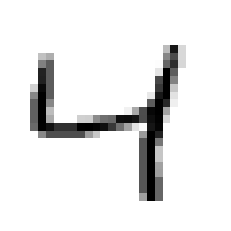

In [22]:
# Örnek kullanım:
showimage(mnist.data, 2)

In [23]:
#70,000 image dosyası, her bir image için 784 boyut(784 feature) mevcut.
#Split Data -> Training Set ve Test Set
# test ve train oranı 1/7 ve 6/7
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [24]:
# Rakam tahminlerimizi check etmek için train_img dataframeini kopyalıyoruz, çünkü az sonra değişecek..
test_img_copy = test_img.copy()

In [25]:
#Verilerimizi Scale etmemiz gerekiyor:
#Çünkü PCA scale edilmemiş verilerde hatalı sonuçlar verebiliyor
#  bu nedenle mutlaka scaling işleminden geçiriyoruz. Bu amaçla da StandardScaler kullanıyoruz...
scaler = StandardScaler()

# Scaler'ı sadece training set üzerinde fit yapmamız yeterli..
scaler.fit(train_img)

# Ama transform işlemini hem training sete hem de test sete yapmamız gerekiyor..
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [26]:
#PCA işlemini uyguluyoruz..
#Variance'ın 95% oranında korunmasını istediğimizi belirtiyoruz..
pca = PCA(.95)

In [27]:
# PCA'i sadece training sete yapmamız yeterli: (1 dk sürebilir)
pca.fit(train_img)

PCA(n_components=0.95)

In [28]:
# Bakalım 784 boyutu kaç boyuta düşürebilmiş (%95 variance'ı koruyarak tabiiki)
print(pca.n_components_)

327


In [29]:
# Şimdi transform işlemiyle hem train hem de test veri setimizin boyutlarını 784'ten 327'e düşürelim:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [39]:
# default solver çok yavaş çalıştığı için daha hızlı olan 'lbfgs' solverı seçerek logisticregression nesnemizi oluşturuyoruz.
#solver değerini vermesek de olur default atasa da program çalışır ancak bu logreg için en iyi değer 'lbfgs'
#yine max_iter sayısını yazmasak da olurdu ancak 10000 diyerek programı optimize ettim
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=10000)

In [40]:
#Şimdi 2. Makine Öğrenmesi modelimiz olan Logistic Regression modelimizi PCA işleminden geçirilmiş veris etimiz üzerinde uygulayacağız.
#LogisticRegression Modelimizi train datamızı kullanarak eğitiyoruz:
logisticRegr.fit(train_img, train_lbl)

c:\Users\mehme\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
#Modelimiz eğitildi şimdi el yazısı rakamları makine öğrenmesi ile tanıma işlemini gerçekletirelim:
logisticRegr.predict(test_img[222].reshape(1,-1))

array(['7'], dtype=object)

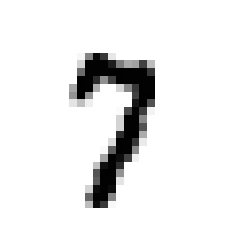

In [44]:
showimage(test_img_copy, 222)